In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
fake_job_postings = pd.read_csv(r"C:\Users\KUNAL PUNIA\Downloads\Fake-Job\data\cleaned_jobs.csv")

In [15]:
X = fake_job_postings[['telecommuting', 'ratio', 'text', 'character_count']]
y = fake_job_postings['fraudulent']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=53)

In [17]:
X_train_num = X_train[['telecommuting', 'ratio', 'character_count']]
X_test_num = X_test[['telecommuting', 'ratio', 'character_count']]

In [18]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.text.values)
count_test = count_vectorizer.transform(X_test.text.values)

In [19]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=1)
tfidf_train = tfidf_vectorizer.fit_transform(X_train.text)
tfidf_test = tfidf_vectorizer.transform(X_test.text)

In [21]:
count_df = pd.DataFrame(count_train.toarray(), columns=count_vectorizer.get_feature_names_out())
tfidf_df = pd.DataFrame(tfidf_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split

nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)
metrics.accuracy_score(y_test, pred)


0.9708237986270023

In [23]:
metrics.f1_score(y_test, pred)

0.7301587301587301

In [25]:
from sklearn.linear_model import SGDClassifier

clf_log = SGDClassifier(loss='log_loss').fit(count_train, y_train)
pred_log = clf_log.predict(count_test)
metrics.accuracy_score(y_test, pred_log)

0.977116704805492

In [26]:
clf_num = SGDClassifier(loss='log_loss').fit(X_train_num, y_train)
pred_num = clf_num.predict(X_test_num)
metrics.accuracy_score(y_test, pred_num)

0.9362128146453089

In [27]:
prediction_array = []

for i, j in zip(pred_num, pred_log):
    if i == 0 and j == 0:
        prediction_array.append(0)
    else:
        prediction_array.append(1)

In [28]:
metrics.accuracy_score(y_test, prediction_array)

0.9754004576659039

In [29]:
metrics.f1_score(y_test, prediction_array)

0.8036529680365296

In [30]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, prediction_array)

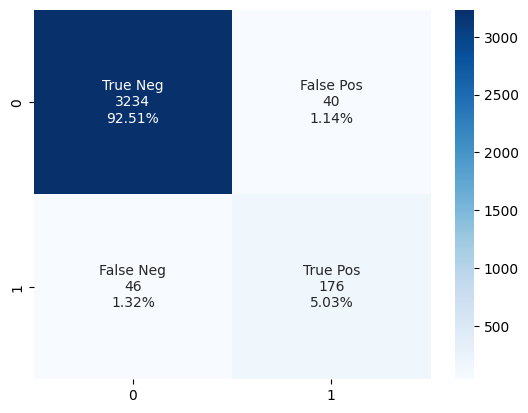

In [31]:
group_names = ["True Neg","False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');

In [32]:
len(y_test[y_test == 0]), len(y_test[y_test == 1])

(3274, 222)

In [34]:
import pickle

# Save the models and vectorizer into a dictionary
model_data = {
    'nb_classifier': nb_classifier,
    'clf_log': clf_log,
    'clf_num': clf_num,
    'count_vectorizer': count_vectorizer
}

# Save the model_data dictionary to a .pkl file
with open('fake_job_model.pkl', 'wb') as f:
    pickle.dump(model_data, f)
